<a href="https://colab.research.google.com/github/Sahithi530/Sahithi_INFO5731_Fall2024/blob/main/Tummala_Sahithi_Exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


I am converting my txt file to csv for easy processing of the data


In [ ]:
import pandas as pd
from google.colab import files

def load_and_process_files():
    print("Please upload your 'stsa-train.txt' and 'stsa-test.txt':")
    uploaded = files.upload()

    try:
        # Load the training data
        train_data = pd.read_csv(
            'stsa-train.txt',
            delimiter=" ",  # Split by spaces
            header=None,  # No headers in the file
            on_bad_lines='warn',  # Skip problematic lines
            engine='python'  # Python engine for complex splitting
        )

        # Concatenate all columns except the first into the 'text' column
        train_data[1] = train_data.iloc[:, 1:].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
        train_data = train_data[[0, 1]]  # Keep only the label and concatenated text
        train_data.columns = ["label", "text"]  # Rename columns

        # Load the testing data
        test_data = pd.read_csv(
            'stsa-test.txt',
            delimiter=" ",
            header=None,
            on_bad_lines='warn',
            engine='python'
        )

        test_data[1] = test_data.iloc[:, 1:].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
        test_data = test_data[[0, 1]]
        test_data.columns = ["label", "text"]

        # Convert labels to integers
        train_data['label'] = train_data['label'].astype(int)
        test_data['label'] = test_data['label'].astype(int)

        # Save processed files
        train_data.to_csv('stsa_train_processed.csv', index=False)
        test_data.to_csv('stsa_test_processed.csv', index=False)

        # Download files to local machine
        print("\nDownloading processed files...")
        files.download('stsa_train_processed.csv')
        files.download('stsa_test_processed.csv')

        # Verify data
        print("\nSample Training Data:")
        print(train_data.head())
        print("\nSample Testing Data:")
        print(test_data.head())

    except Exception as e:
        print("Error processing files:", e)
        return None, None

    return train_data, test_data

# Run the script
train_data, test_data = load_and_process_files()


Please upload your 'stsa-train.txt' and 'stsa-test.txt':


Saving stsa-test.txt to stsa-test.txt
Saving stsa-train.txt to stsa-train.txt


Streaming output truncated to the last 5000 lines.

  train_data = pd.read_csv(
<ipython-input-2-339907ea2fd0>:10: ParserWarning: Skipping line 6439: Expected 18 fields in line 6439, saw 20

  train_data = pd.read_csv(
<ipython-input-2-339907ea2fd0>:10: ParserWarning: Skipping line 6440: Expected 18 fields in line 6440, saw 29

  train_data = pd.read_csv(
<ipython-input-2-339907ea2fd0>:10: ParserWarning: Skipping line 6443: Expected 18 fields in line 6443, saw 23

  train_data = pd.read_csv(
<ipython-input-2-339907ea2fd0>:10: ParserWarning: Skipping line 6444: Expected 18 fields in line 6444, saw 27

  train_data = pd.read_csv(
<ipython-input-2-339907ea2fd0>:10: ParserWarning: Skipping line 6445: Expected 18 fields in line 6445, saw 22

  train_data = pd.read_csv(
<ipython-input-2-339907ea2fd0>:10: ParserWarning: Skipping line 6447: Expected 18 fields in line 6447, saw 28

  train_data = pd.read_csv(
<ipython-input-2-339907ea2fd0>:10: ParserWarning: Skipping line 6448: Expected 18 fiel

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Sample Training Data:
   label                                               text
0      1  a stirring , funny and finally transporting re...
1      0  apparently reassembled from the cutting-room f...
2      1  jonathan parker 's bartleby should have been t...
3      0  a fan film that for the uninitiated plays bett...
4      1  béart and berling are both superb , while hupp...

Sample Testing Data:
   label                                               text
0      0     no movement , no yuks , not much of anything .
1      1            this is one of polanski 's best films .
2      0     even as lame horror flicks go , this is lame .
3      1              most new movies have a bright sheen .
4      1  nicely serves as an examination of a society i...


I am performing my machine learning algorithm individually for each model startting with multinominalnb

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess the test and train dataset
def load_data():
    train_data = pd.read_csv('stsa_train_processed.csv')  # Process train file
    test_data = pd.read_csv('stsa_test_processed.csv')    # Process test file
    return train_data, test_data

# split and vectorization
def preprocess_data(train_data, test_data):
    X_train_full = train_data['text']
    y_train_full = train_data['label']
    X_test = test_data['text']
    y_test = test_data['label']

    # Split training data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
    )

    # Convert text to numeric using CountVectorizer
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_val_vectorized = vectorizer.transform(X_val)
    X_test_vectorized = vectorizer.transform(X_test)

    return X_train_vectorized, X_val_vectorized, X_test_vectorized, y_train, y_val, y_test, vectorizer

# Step 3: Train model with cross-validation
def train_with_cross_validation(X_train, y_train):
    model = MultinomialNB()
    # Perform 10-fold cross-validation as mentioned
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"10-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    return model

# Step 4: Train final model and evaluate on validation and test data
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Train on the full training data
    model.fit(X_train, y_train)

    # Validating evaluation
    y_val_pred = model.predict(X_val)
    print("\nValidation Set Performance:")
    print(classification_report(y_val, y_val_pred))

    # Test set evaluation
    y_test_pred = model.predict(X_test)
    print("\nTest Set Performance:")
    print(classification_report(y_test, y_test_pred))
    print(f"Test Set Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# mainscript is being  executed
if __name__ == "__main__":
    # Load and preprocess data
    train_data, test_data = load_data()
    X_train, X_val, X_test, y_train, y_val, y_test, vectorizer = preprocess_data(train_data, test_data)

    # Training with cross-validation
    model = train_with_cross_validation(X_train, y_train)

    # Evaluating the model
    evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)


10-Fold Cross-Validation Accuracy: 0.7673

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       300
           1       0.77      0.81      0.79       334

    accuracy                           0.77       634
   macro avg       0.77      0.77      0.77       634
weighted avg       0.77      0.77      0.77       634


Test Set Performance:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       218
           1       0.75      0.85      0.80       192

    accuracy                           0.80       410
   macro avg       0.80      0.80      0.80       410
weighted avg       0.80      0.80      0.80       410

Test Set Accuracy: 0.7951


svm model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load and preprocess data
def load_data():
    train_data = pd.read_csv('stsa_train_processed.csv')  # Process train file
    test_data = pd.read_csv('stsa_test_processed.csv')    # Processtest file
    return train_data, test_data

# Step 2: Train-test split and vectorization as mentioned
def preprocess_data(train_data, test_data):
    X_train_full = train_data['text']
    y_train_full = train_data['label']
    X_test = test_data['text']
    y_test = test_data['label']

    # Splitting training data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
    )

    # Convert text to numeric features using CountVectorizer
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_val_vectorized = vectorizer.transform(X_val)
    X_test_vectorized = vectorizer.transform(X_test)

    return X_train_vectorized, X_val_vectorized, X_test_vectorized, y_train, y_val, y_test, vectorizer

# Step 3: Training SVM model with cross-validation
def train_with_cross_validation(X_train, y_train):
    model = SVC(kernel='linear')  # Linear kernel for text classification
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"10-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    return model

# Step 4: Train final model and evaluate on validation and test data
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Train on the full training data
    model.fit(X_train, y_train)

    # Validating evaluation
    y_val_pred = model.predict(X_val)
    print("\nValidation Set Performance:")
    print(classification_report(y_val, y_val_pred))

    # Testing set evaluation
    y_test_pred = model.predict(X_test)
    print("\nTest Set Performance:")
    print(classification_report(y_test, y_test_pred))
    print(f"Test Set Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# execution of mainscript
if __name__ == "__main__":
    # Load and preprocess data
    train_data, test_data = load_data()
    X_train, X_val, X_test, y_train, y_val, y_test, vectorizer = preprocess_data(train_data, test_data)

    # Train with cross-validation
    model = train_with_cross_validation(X_train, y_train)

    # Evaluate the model
    evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)


10-Fold Cross-Validation Accuracy: 0.7337

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       300
           1       0.78      0.81      0.80       334

    accuracy                           0.78       634
   macro avg       0.78      0.78      0.78       634
weighted avg       0.78      0.78      0.78       634


Test Set Performance:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       218
           1       0.74      0.81      0.78       192

    accuracy                           0.78       410
   macro avg       0.78      0.78      0.78       410
weighted avg       0.78      0.78      0.78       410

Test Set Accuracy: 0.7805


KNN Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load and preprocess data
def load_data():
    train_data = pd.read_csv('stsa_train_processed.csv')  # Processed train file
    test_data = pd.read_csv('stsa_test_processed.csv')    # Processed test file
    return train_data, test_data

# Step 2: split and vectorization
def preprocess_data(train_data, test_data):
    X_train_full = train_data['text']
    y_train_full = train_data['label']
    X_test = test_data['text']
    y_test = test_data['label']

    # (80% train, 20% validation)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
    )

    # Convert text to numeric features using CountVectorizer
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_val_vectorized = vectorizer.transform(X_val)
    X_test_vectorized = vectorizer.transform(X_test)

    return X_train_vectorized, X_val_vectorized, X_test_vectorized, y_train, y_val, y_test, vectorizer

# Step 3: Training KNN
def train_with_cross_validation(X_train, y_train):
    model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"10-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    return model

# Step 4: Training final model and evaluate on validation and test data
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Train on the full training data
    model.fit(X_train, y_train)

    # Validating evaluation
    y_val_pred = model.predict(X_val)
    print("\nValidation Set Performance:")
    print(classification_report(y_val, y_val_pred))
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Testing set evaluation
    y_test_pred = model.predict(X_test)
    print("\nTest Set Performance:")
    print(classification_report(y_test, y_test_pred))
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")

#execution of main script
if __name__ == "__main__":
    # Load and preprocess data
    train_data, test_data = load_data()
    X_train, X_val, X_test, y_train, y_val, y_test, vectorizer = preprocess_data(train_data, test_data)

    # Training with cross-validation
    model = train_with_cross_validation(X_train, y_train)

    # Evaluating  the model
    evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)


10-Fold Cross-Validation Accuracy: 0.5807

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.56      0.65      0.60       300
           1       0.63      0.54      0.58       334

    accuracy                           0.59       634
   macro avg       0.60      0.59      0.59       634
weighted avg       0.60      0.59      0.59       634

Validation Accuracy: 0.5915

Test Set Performance:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       218
           1       0.63      0.54      0.58       192

    accuracy                           0.63       410
   macro avg       0.63      0.63      0.63       410
weighted avg       0.63      0.63      0.63       410

Test Accuracy: 0.6341


Decision Tree Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Loading and preprocess data
def load_data():
    train_data = pd.read_csv('stsa_train_processed.csv')  # Process train file
    test_data = pd.read_csv('stsa_test_processed.csv')    # Processe test file
    return train_data, test_data

# Step 2: Train-test split and vectorization
def preprocess_data(train_data, test_data):
    X_train_full = train_data['text']
    y_train_full = train_data['label']
    X_test = test_data['text']
    y_test = test_data['label']

    # Splitting training data into train and validation sets with 80,20
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
    )

    # Converting text to numeric features using CountVectorizer
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_val_vectorized = vectorizer.transform(X_val)
    X_test_vectorized = vectorizer.transform(X_test)

    return X_train_vectorized, X_val_vectorized, X_test_vectorized, y_train, y_val, y_test, vectorizer

# Step 3: Training Decision Tree with cross-validation
def train_with_cross_validation(X_train, y_train):
    model = DecisionTreeClassifier(random_state=42)  # Initialize Decision Tree Classifier
    # Performing 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"10-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    return model

# Step 4: Training final model and evaluate on validation and test data
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Training on the full training data
    model.fit(X_train, y_train)

    # Validating evaluation
    y_val_pred = model.predict(X_val)
    print("\nValidation Set Performance:")
    print(classification_report(y_val, y_val_pred))
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Testing set evaluation
    y_test_pred = model.predict(X_test)
    print("\nTest Set Performance:")
    print(classification_report(y_test, y_test_pred))
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")

# execution of main script
if __name__ == "__main__":
    # Load and preprocess data
    train_data, test_data = load_data()
    X_train, X_val, X_test, y_train, y_val, y_test, vectorizer = preprocess_data(train_data, test_data)

    # Training with cross-validation
    model = train_with_cross_validation(X_train, y_train)

    # Evaluating  the model
    evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)


10-Fold Cross-Validation Accuracy: 0.6367

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.64      0.55      0.59       300
           1       0.64      0.72      0.68       334

    accuracy                           0.64       634
   macro avg       0.64      0.64      0.64       634
weighted avg       0.64      0.64      0.64       634

Validation Accuracy: 0.6404

Test Set Performance:
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       218
           1       0.64      0.74      0.69       192

    accuracy                           0.68       410
   macro avg       0.69      0.69      0.68       410
weighted avg       0.69      0.68      0.68       410

Test Accuracy: 0.6829


Random Forest Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Loading  and preprocess data
def load_data():
    train_data = pd.read_csv('stsa_train_processed.csv')  # Process train file
    test_data = pd.read_csv('stsa_test_processed.csv')    # Process test file
    return train_data, test_data

# Step 2: Train-test split and vectorization
def preprocess_data(train_data, test_data):
    X_train_full = train_data['text']
    y_train_full = train_data['label']
    X_test = test_data['text']
    y_test = test_data['label']

    # (80% train, 20% validation)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
    )

    # Converting text to numeric features using CountVectorizer
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_val_vectorized = vectorizer.transform(X_val)
    X_test_vectorized = vectorizer.transform(X_test)

    return X_train_vectorized, X_val_vectorized, X_test_vectorized, y_train, y_val, y_test, vectorizer

# Step 3: Training Random Forest with cross-validation
def train_with_cross_validation(X_train, y_train):
    model = RandomForestClassifier(random_state=42, n_estimators=100)  # Initialize Random Forest Classifier
    # Performing 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"10-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    return model

# Step 4: Training final model and evaluate on validating and test data
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Training on the full training data
    model.fit(X_train, y_train)

    # Validating  evaluation
    y_val_pred = model.predict(X_val)
    print("\nValidation Set Performance:")
    print(classification_report(y_val, y_val_pred))
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Testing set evaluation
    y_test_pred = model.predict(X_test)
    print("\nTest Set Performance:")
    print(classification_report(y_test, y_test_pred))
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")

#  execution of main script
if __name__ == "__main__":
    # Load and preprocess data
    train_data, test_data = load_data()
    X_train, X_val, X_test, y_train, y_val, y_test, vectorizer = preprocess_data(train_data, test_data)

    # Training with cross-validation
    model = train_with_cross_validation(X_train, y_train)

    # Evaluating the model
    evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)


10-Fold Cross-Validation Accuracy: 0.7116

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       300
           1       0.71      0.81      0.76       334

    accuracy                           0.73       634
   macro avg       0.73      0.72      0.72       634
weighted avg       0.73      0.73      0.72       634

Validation Accuracy: 0.7256

Test Set Performance:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       218
           1       0.68      0.82      0.75       192

    accuracy                           0.74       410
   macro avg       0.75      0.74      0.74       410
weighted avg       0.75      0.74      0.74       410

Test Accuracy: 0.7390


XGBOOST Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier

# Step 1: Load data
def load_data():
    train_data = pd.read_csv('stsa_train_processed.csv')  # Process train file
    test_data = pd.read_csv('stsa_test_processed.csv')    # Process test file
    return train_data, test_data

# Step 2: Preprocessing  data (train-test split and vectorization)
def preprocess_data(train_data, test_data):
    X_train_full = train_data['text']
    y_train_full = train_data['label']
    X_test = test_data['text']
    y_test = test_data['label']

    #  (80% for training, 20% for validation)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
    )

    # Converting text to numeric features using CountVectorizer
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_val_vectorized = vectorizer.transform(X_val)
    X_test_vectorized = vectorizer.transform(X_test)

    return X_train_vectorized, X_val_vectorized, X_test_vectorized, y_train, y_val, y_test, vectorizer

# Step 3: Training the XGBoost model with cross-validation
def train_with_cross_validation(X_train, y_train):
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    # Performing  10-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"10-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    return model

# Step 4: Training the final model and evaluate on validation and test sets
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Training the model on the full training data
    model.fit(X_train, y_train)

    # Validating set evaluation
    y_val_pred = model.predict(X_val)
    print("\nValidation Set Performance:")
    print(classification_report(y_val, y_val_pred))
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Testing set evaluation
    y_test_pred = model.predict(X_test)
    print("\nTest Set Performance:")
    print(classification_report(y_test, y_test_pred))
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")

#  execution of mainscript
if __name__ == "__main__":
    # Load and preprocess data
    train_data, test_data = load_data()
    X_train, X_val, X_test, y_train, y_val, y_test, vectorizer = preprocess_data(train_data, test_data)

    # Training the model with cross-validation
    model = train_with_cross_validation(X_train, y_train)

    # Evaluating the model on validation and test datasets
    evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:03:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:03:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:03:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:03:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:03:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

10-Fold Cross-Validation Accuracy: 0.6888


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:03:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Set Performance:
              precision    recall  f1-score   support

           0       0.76      0.58      0.66       300
           1       0.69      0.83      0.75       334

    accuracy                           0.71       634
   macro avg       0.72      0.71      0.71       634
weighted avg       0.72      0.71      0.71       634

Validation Accuracy: 0.7145

Test Set Performance:
              precision    recall  f1-score   support

           0       0.80      0.58      0.67       218
           1       0.64      0.84      0.72       192

    accuracy                           0.70       410
   macro avg       0.72      0.71      0.70       410
weighted avg       0.72      0.70      0.70       410

Test Accuracy: 0.7000


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Word2Vec Model , using XGboost

In [ ]:
import pandas as pd
import numpy as np
import gensim
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.base import BaseEstimator
import xgboost as xgb
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Downloaded necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Load data
def load_data():
    train_data = pd.read_csv('stsa_train_processed.csv')  # Process train file
    test_data = pd.read_csv('stsa_test_processed.csv')    # Process test file
    return train_data, test_data

# Step 2: Preprocesings data
def preprocess_data(train_data, test_data):
    stop_words = set(stopwords.words('english'))

    # Tokenizing and remove stopwords
    def clean_text(text):
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        return tokens

    X_train_full = train_data['text'].apply(clean_text)
    y_train_full = train_data['label']
    X_test = test_data['text'].apply(clean_text)
    y_test = test_data['label']

    # Splitting training data into train and validation sets (80% for training, 20% for validation)
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Step 3: Training a Word2Vec model
def train_word2vec(X_train, X_val, X_test):
    # Training Word2Vec model on training data
    model_w2v = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)

    # Creating document embeddings by averaging the word embeddings
    def get_document_vector(tokens):
        vectors = [model_w2v.wv[word] for word in tokens if word in model_w2v.wv]
        if vectors:
            return np.mean(vectors, axis=0)
        else:
            return np.zeros(model_w2v.vector_size)

    X_train_vectorized = np.array([get_document_vector(tokens) for tokens in X_train])
    X_val_vectorized = np.array([get_document_vector(tokens) for tokens in X_val])
    X_test_vectorized = np.array([get_document_vector(tokens) for tokens in X_test])

    return X_train_vectorized, X_val_vectorized, X_test_vectorized, model_w2v

# Step 4: XGBoost with Cross-validation
def train_with_cross_validation(X_train, y_train):
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"10-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f}")

    return model

# Step 5: Training the model and evaluate on validation and test sets
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Training the model on the full training data
    model.fit(X_train, y_train)

    # Validating set evaluation
    y_val_pred = model.predict(X_val)
    print("\nValidation Set Performance:")
    print(classification_report(y_val, y_val_pred))
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Testing set evaluation
    y_test_pred = model.predict(X_test)
    print("\nTest Set Performance:")
    print(classification_report(y_test, y_test_pred))
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")

#  execution of main script
if __name__ == "__main__":
    # Load and preprocess data
    train_data, test_data = load_data()
    X_train, X_val, X_test, y_train, y_val, y_test = preprocess_data(train_data, test_data)

    # Training Word2Vec model and get document vectors
    X_train_vectorized, X_val_vectorized, X_test_vectorized, model_w2v = train_word2vec(X_train, X_val, X_test)

    # Training XGBoost model with cross-validation
    model = train_with_cross_validation(X_train_vectorized, y_train)

    # Evaluating  the model on validation and test datasets
    evaluate_model(model, X_train_vectorized, y_train, X_val_vectorized, y_val, X_test_vectorized, y_test)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:03:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:03:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:03:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:03:32] WARNING: /workspace/src/learner.cc:740: 
Paramete

10-Fold Cross-Validation Accuracy: 0.5724


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:03:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Set Performance:
              precision    recall  f1-score   support

           0       0.58      0.57      0.58       300
           1       0.62      0.63      0.62       334

    accuracy                           0.60       634
   macro avg       0.60      0.60      0.60       634
weighted avg       0.60      0.60      0.60       634

Validation Accuracy: 0.6025

Test Set Performance:
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       218
           1       0.59      0.61      0.60       192

    accuracy                           0.62       410
   macro avg       0.62      0.62      0.62       410
weighted avg       0.62      0.62      0.62       410

Test Accuracy: 0.6195


In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Downloading NLTK stopwords (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Preprocessing Load data
def load_and_preprocess_data():
    # Loading data
    train_data = pd.read_csv('stsa_train_processed.csv')
    test_data = pd.read_csv('stsa_test_processed.csv')

    # Tokenization and stopword removal
    stop_words = set(stopwords.words('english'))

    def clean_text(text):
        tokens = word_tokenize(text.lower())  # Tokenize text
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords
        return ' '.join(tokens)  # Join tokens back into a string for tokenization

    # Applying cleaning to text data
    X_train = train_data['text'].apply(clean_text)
    y_train = train_data['label']
    X_test = test_data['text'].apply(clean_text)
    y_test = test_data['label']

    # Splitting training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Step 2: BERT Model - Loading the tokenizer and the pre-trained BERT model
def load_bert_model():
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # Using BERT tokenizer
    model = BertModel.from_pretrained('bert-base-uncased')  # Loading BERT model
    return tokenizer, model

# Step 3: Tokenizing and Generating BERT Embeddings
def get_bert_embeddings(texts, tokenizer, model):
    # Tokenize texts
    encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=512, return_tensors='pt')

    # Generating embeddings
    with torch.no_grad():
        outputs = model(**encodings)

    # Extracting the embeddings of the [CLS] token
    return outputs.last_hidden_state[:, 0, :].numpy()

# Step 4: Extracting BERT embeddings for training, validation, and test sets
def extract_bert_embeddings(X_train, X_val, X_test, tokenizer, model):
    X_train_embeddings = get_bert_embeddings(X_train, tokenizer, model)
    X_val_embeddings = get_bert_embeddings(X_val, tokenizer, model)
    X_test_embeddings = get_bert_embeddings(X_test, tokenizer, model)
    return X_train_embeddings, X_val_embeddings, X_test_embeddings

# Step 5: PCA for dimensionality reduction
def apply_pca(embeddings, n_components=50):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(embeddings)

# Step 6: Main function to run the whole pipeline
if __name__ == '__main__':
    # Preprocessing data
    X_train, X_val, X_test, y_train, y_val, y_test = load_and_preprocess_data()

    # Load BERT tokenizer and model
    tokenizer, model = load_bert_model()

    # Extracting BERT
    X_train_embeddings, X_val_embeddings, X_test_embeddings = extract_bert_embeddings(X_train, X_val, X_test, tokenizer, model)

    # Apply PCA
    X_train_pca = apply_pca(X_train_embeddings)
    X_val_pca = apply_pca(X_val_embeddings)
    X_test_pca = apply_pca(X_test_embeddings)

    # Training a classifier (e.g., Logistic Regression)
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit(X_train_pca, y_train)

    # Predicting and evaluating
    y_pred = classifier.predict(X_val_pca)
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.5315457413249212
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.48      0.49       300
           1       0.55      0.58      0.57       334

    accuracy                           0.53       634
   macro avg       0.53      0.53      0.53       634
weighted avg       0.53      0.53      0.53       634



## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

We will be perforiming machine learning algorithms for text clustering and we are using k-means clustering for the reviews dataset that is provided

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving Amazon_Unlocked_Mobile.csv to Amazon_Unlocked_Mobile.csv
File uploaded: Amazon_Unlocked_Mobile.csv
                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only.

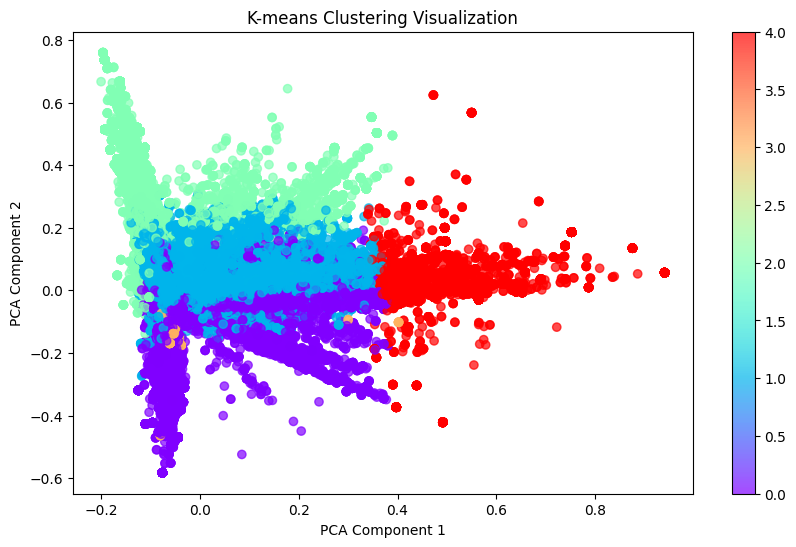

Cluster 0:
2                                               pleased
11    great product came two days ordering one littl...
12    guys best little situation item quickly fixed ...
21    prosbeautiful screencapable running chrometake...
26    reasons star rating opinion better iphone tend...
30                                  described fast ship
31                                    perfect every way
32           one phones bad charger port want send back
36           met expectations cant complain great price
38                  excellent product perfect condition
Name: cleaned_text, dtype: object


Cluster 1:
0     feel lucky found used phone us used hard phone...
1     nice phone nice grade pantach revue clean set ...
4     great phone replace lost phone thing volume bu...
5     already phone problems know stated used dang s...
6     charging port loose got soldered needed new ba...
7     phone looks good wouldnt stay charged buy new ...
8     originally using samsung galaxy sprint w

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from google.colab import files

nltk.download('stopwords')

# uploading file to colab
def upload_file():
    uploaded = files.upload()
    file_path = next(iter(uploaded))  # Get the name of the  file
    return file_path

# Uploading the CSV file
file_path = upload_file()
print(f"File uploaded: {file_path}")

# Loading dataset
data = pd.read_csv(file_path)

# Displaying first few rows of the data
print(data.head())

# Text preprocessing function
def preprocess_text(text):
    # Check if text is not a string (e.g., if it's NaN or a number)
    if not isinstance(text, str):
        return ''  # Return empty string for non-string values

    # Removing non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converting to lowercase
    text = text.lower()
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Applying preprocessing to the text column, ensuring non-string values are handled
data['cleaned_text'] = data['Reviews'].apply(preprocess_text)

# Showing the cleaned data
print(data[['Reviews', 'cleaned_text']].head())

# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limit features to avoid memory issues
X = vectorizer.fit_transform(data['cleaned_text'])

# Apply K-means clustering algorithm
num_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to the data
data['cluster'] = kmeans.labels_

# Printing the cluster assignments
print("Cluster assignments:")
print(data[['Reviews', 'cleaned_text', 'cluster']].head(10))

# Reducing dimensionality for visualization using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Plotting the clustered data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow', alpha=0.7)
plt.colorbar(scatter)
plt.title("K-means Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Analyze the clusters
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(data[data['cluster'] == i]['cleaned_text'].head(10))
    print("\n")

# Save the output to a CSV file in the Colab environment
output_filename = '/content/output_1.csv'  # Save file to Colab's environment
data.to_csv(output_filename, index=False)
print(f"Output saved to {output_filename}")

# and download the file to the local machine
files.download(output_filename)


DBSCAN

Since a lot of runtime is being used and google colab is not able to accomodate it . I just wanted to show the it in chunks

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving Amazon_Unlocked_Mobile.csv to Amazon_Unlocked_Mobile (1).csv
File uploaded: Amazon_Unlocked_Mobile (1).csv
                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. T

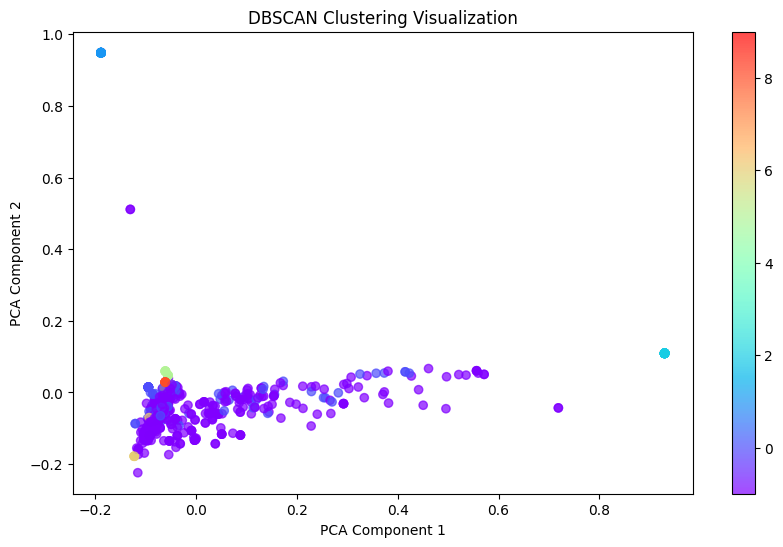

Cluster 0:
2                                               pleased
7     phone looks good wouldnt stay charged buy new ...
9     battery life great responsive touch issue some...
20    battery old used barely holds charge otherwise...
22    purchased phone december christmas present son...
26    reasons star rating opinion better iphone tend...
39                                            excellent
43                                came arabian keyboard
47                                   sharp classy phone
49                                               gooddd
Name: cleaned_text, dtype: object


Cluster 1:
40     excelente
41     excelente
58     excelente
60     excelente
65     excelente
66     excelente
100    excelente
102    excelente
186    excelente
250    excelente
Name: cleaned_text, dtype: object


Cluster 2:
48           good
92           good
104      ver good
139          good
201          good
268          good
323          good
330          good
336    good tanks
354

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD
from google.colab import files

nltk.download('stopwords')

# Function to upload a CSV file in Google Colab
def upload_file():
    uploaded = files.upload()
    file_path = next(iter(uploaded))  # Get the name of the file
    return file_path

# Uploading the CSV file
file_path = upload_file()
print(f"File uploaded: {file_path}")

# Loading only the first 1000 rows of the dataset to save memory
data = pd.read_csv(file_path, nrows=1000)

# Displaying first few rows of the data
print(data.head())

# Text preprocessing function
def preprocess_text(text):
    # Check if text is not a string (e.g., if it's NaN or a number)
    if not isinstance(text, str):
        return ''  # Return empty string for non-string values

    # Removing non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converting to lowercase
    text = text.lower()
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the text column, ensuring non-string values are handled
data['cleaned_text'] = data['Reviews'].apply(preprocess_text)

#  cleaned data
print(data[['Reviews', 'cleaned_text']].head())

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limit features to easy access of the datset since it is a large dataset
X = vectorizer.fit_transform(data['cleaned_text'])

# Reducing dimensionality before applying DBSCAN using TruncatedSVD (for large sparse matrices)
svd = TruncatedSVD(n_components=100, random_state=42)  # Reduce to 100 dimensions (adjust as needed)
X_reduced = svd.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X_reduced)

# Assigning DBSCAN cluster labels to the data
data['cluster'] = dbscan_labels

# Printing the cluster assignments
print("DBSCAN Cluster assignments:")
print(data[['Reviews', 'cleaned_text', 'cluster']].head(10))

# Reducing dimensionality for visualization using PCA (for plotting)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_reduced)

# Plotting the clustered data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='rainbow', alpha=0.7)
plt.colorbar(scatter)
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Analyze the clusters
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Exclude noise (-1)
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(data[data['cluster'] == i]['cleaned_text'].head(10))
    print("\n")

# Handling noise points (labeled as -1)
print("Noise points (label = -1):")
print(data[data['cluster'] == -1].head(10))

# Saving the output to a CSV file in the Colab environment
output_filename = '/content/output_dbscan.csv'  # Save file to Colab's environment
data.to_csv(output_filename, index=False)
print(f"Output saved to {output_filename}")

# Download the file to the local
files.download(output_filename)


Hierarchical (Agglomerative) Clustering

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving Amazon_Unlocked_Mobile.csv to Amazon_Unlocked_Mobile (3).csv
File uploaded: Amazon_Unlocked_Mobile (3).csv
                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. T

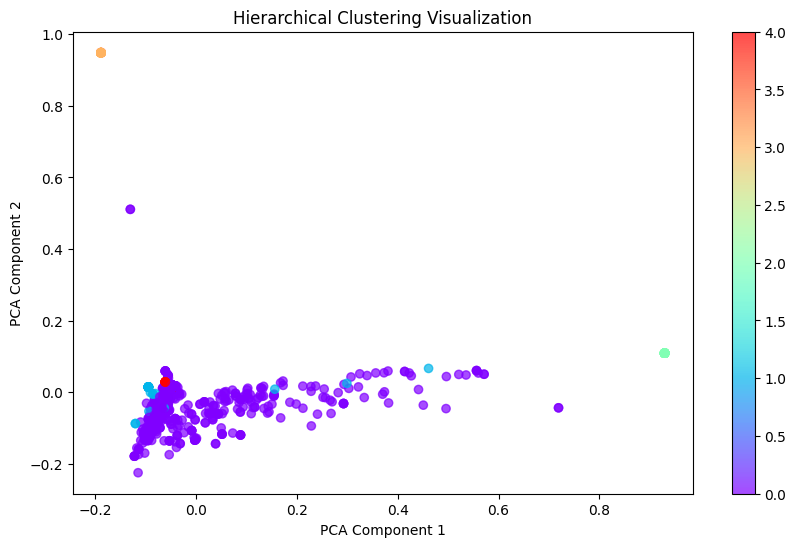

Cluster 0:
0    feel lucky found used phone us used hard phone...
1    nice phone nice grade pantach revue clean set ...
2                                              pleased
3       works good goes slow sometimes good phone love
4    great phone replace lost phone thing volume bu...
5    already phone problems know stated used dang s...
6    charging port loose got soldered needed new ba...
7    phone looks good wouldnt stay charged buy new ...
8    originally using samsung galaxy sprint wanted ...
9    battery life great responsive touch issue some...
Name: cleaned_text, dtype: object


Cluster 1:
38                   excellent product perfect condition
39                                             excellent
55                                             excellent
64                    excellent product righti recommend
94                                     excellent product
106    excellent phone special functions communicated...
130                                       good exc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from sklearn.cluster import AgglomerativeClustering
from google.colab import files

nltk.download('stopwords')

# Function to upload a CSV file to environment
def upload_file():
    uploaded = files.upload()
    file_path = next(iter(uploaded))  # Get the name of the  file
    return file_path

# Uploading the CSV file
file_path = upload_file()
print(f"File uploaded: {file_path}")

# Loading dataset
data = pd.read_csv(file_path)

# Use only the first 1000 reviews for processing for easy review
data = data.head(1000)

# Display first few rows of the data
print(data.head())

# Text preprocessing function
def preprocess_text(text):
    # Check if text is not a string (e.g., if it's NaN or a number)
    if not isinstance(text, str):
        return ''  # Return empty string for non-string values

    # Removing non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converting to lowercase
    text = text.lower()
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the text column, ensuring non-string values are handled
data['cleaned_text'] = data['Reviews'].apply(preprocess_text)

# Showing the cleaned data
print(data[['Reviews', 'cleaned_text']].head())

# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limit features to avoid memory issues
X = vectorizer.fit_transform(data['cleaned_text'])

# Apply Hierarchical (Agglomerative) Clustering
agglomerative = AgglomerativeClustering(n_clusters=5, linkage='ward')  # You can adjust n_clusters and linkage method
data['cluster'] = agglomerative.fit_predict(X.toarray())

# Printing the cluster assignments
print("Hierarchical Cluster assignments:")
print(data[['Reviews', 'cleaned_text', 'cluster']].head(10))

# Reducing dimensionality for visualization using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Plotting the clustered data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='rainbow', alpha=0.7)
plt.colorbar(scatter)
plt.title("Hierarchical Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Analyze the clusters
num_clusters = len(set(data['cluster']))  # Get the number of clusters
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(data[data['cluster'] == i]['cleaned_text'].head(10))
    print("\n")

# Saving the output to a CSV file in the Colab environment
output_filename = '/content/output_hierarchical.csv'  # Save file to Colab's environment
data.to_csv(output_filename, index=False)
print(f"Output saved to {output_filename}")

# Downloading the file to the local
files.download(output_filename)


Performing optimized word2vec

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import numpy as np
from google.colab import files

nltk.download('stopwords')

# Function to upload a CSV file in colab environment
def upload_file():
    uploaded = files.upload()
    file_path = next(iter(uploaded))  # Get the name of the  file
    return file_path

# Uploading the CSV file
file_path = upload_file()
print(f"File uploaded: {file_path}")

# Loading dataset
data = pd.read_csv(file_path)

# Display first few rows of the data
print(data.head())

# Text preprocessing function
def preprocess_text(text):
    # Check if text is not a string (e.g., if it's NaN or a number)
    if not isinstance(text, str):
        return ''  # Return empty string for non-string values

    # Removing non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converting to lowercase
    text = text.lower()
    # Removin stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words  # Return as list of words (for Word2Vec)

# Apply preprocessing to the text column of the csv file
data['cleaned_text'] = data['Reviews'].apply(preprocess_text)

# Showing the cleaned data
print(data[['Reviews', 'cleaned_text']].head())

# Creating a list of tokenized texts for Word2Vec
tokenized_texts = data['cleaned_text'].tolist()

# Word2Vec model wiht min optimize method
model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4, sg=0)

# Training the Word2Vec model
model.save("word2vec.model")

# Example: Get the vector for a word
word_vector = model.wv['good']  # Example word
print("Vector for the word 'good':")
print(word_vector)

# Saving the  embeddings to a numpy array
word_vectors = np.array([model.wv[word] for word in model.wv.index_to_key])

# Optional: Save word embeddings to CSV
word_embedding_df = pd.DataFrame(word_vectors, index=model.wv.index_to_key)
word_embedding_df.to_csv('/content/word2vec_embeddings.csv', index=True)
print("Word2Vec embeddings saved.")

# Downloading the embeddings
files.download('/content/word2vec_embeddings.csv')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving Amazon_Unlocked_Mobile.csv to Amazon_Unlocked_Mobile (10).csv
File uploaded: Amazon_Unlocked_Mobile (10).csv
                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Bert Model

In [5]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.cluster import MiniBatchKMeans
import nltk
import re
from nltk.corpus import stopwords
from torch.utils.data import DataLoader, Dataset
import numpy as np
from google.colab import files

# Downloading NLTK data only if not already present
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Compile regex pattern once
non_alpha_pattern = re.compile(r'[^a-zA-Z\s]')
stop_words = set(stopwords.words('english'))
#preprocessing the text conversions
def preprocess_text(text):
    """Optimized text preprocessing"""
    if pd.isna(text):  # Handle NaN values
        return ''
    if not isinstance(text, str):
        return str(text)
    text = non_alpha_pattern.sub('', text)
    text = text.lower()
    words = text.split()
    return ' '.join(word for word in words if word not in stop_words)
#vectorization
class TextDataset(Dataset):
    """Custom Dataset for batch processing"""
    def __init__(self, texts, tokenizer, max_length=512):
        self.texts = texts.values  # Convert to numpy array
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])  # Ensure text is string
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze()
        }

def process_texts(texts, tokenizer, model, device, batch_size=32):
    """Process all texts in batches"""
    # Create dataset and dataloader
    dataset = TextDataset(texts, tokenizer)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    all_embeddings = []
    model.eval()

    with torch.no_grad():
        for batch in dataloader:
            # Move batch to device
            batch_input = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device)
            }

            outputs = model(**batch_input)
            batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            all_embeddings.append(batch_embeddings)

    return np.vstack(all_embeddings)

def main():
    try:
        # Set device
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {device}")

        # Load BERT components
        print("Loading BERT model and tokenizer...")
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        model = BertModel.from_pretrained('bert-base-uncased', torch_dtype=torch.float16).to(device)

        print("Reading CSV file...")
        # Read only first 1000 rows
        data = pd.read_csv('Amazon_Unlocked_Mobile.csv', nrows=1000)

        if 'Reviews' not in data.columns:
            print("Available columns:", data.columns.tolist())
            raise ValueError("'Reviews' column not found in the CSV file")

        print(f"Processing {len(data)} reviews...")

        # Preprocess all texts
        print("Preprocessing texts...")
        data['cleaned_text'] = data['Reviews'].apply(preprocess_text)

        # Get embeddings
        print("Generating BERT embeddings...")
        embeddings = process_texts(
            data['cleaned_text'],
            tokenizer,
            model,
            device,
            batch_size=32
        )

        print("Performing clustering...")
        kmeans = MiniBatchKMeans(
            n_clusters=5,
            random_state=42,
            batch_size=100,
            max_iter=100
        )

        data['cluster'] = kmeans.fit_predict(embeddings)

        # Add cluster centers if needed
        cluster_centers = kmeans.cluster_centers_

        # Calculate distances to cluster centers for each point
        distances = kmeans.transform(embeddings)
        data['distance_to_center'] = np.min(distances, axis=1)

        # Sort within each cluster by distance to center
        data = data.sort_values(['cluster', 'distance_to_center'])

        output_file = 'text_clusters_bert.csv'
        print(f"Saving results to {output_file}")
        data.to_csv(output_file, index=False)

        # Print some statistics
        print("\nClustering Results:")
        print("Number of reviews per cluster:")
        print(data['cluster'].value_counts().sort_index())

        # Print example reviews from each cluster
        print("\nExample reviews from each cluster:")
        for cluster in range(5):
            print(f"\nCluster {cluster}:")
            # Get 3 examples closest to cluster center
            examples = data[data['cluster'] == cluster].head(3)
            for _, row in examples.iterrows():
                print(f"- {row['Reviews'][:100]}...")

        files.download(output_file)
        print("\nProcessing complete!")

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Error type:", type(e).__name__)
        import traceback
        print("Full traceback:")
        traceback.print_exc()

if __name__ == "__main__":
    main()

Using device: cuda
Loading BERT model and tokenizer...
Reading CSV file...
Processing 1000 reviews...
Preprocessing texts...
Generating BERT embeddings...
Performing clustering...
Saving results to text_clusters_bert.csv

Clustering Results:
Number of reviews per cluster:
cluster
0     22
1    182
2    411
3    102
4    283
Name: count, dtype: int64

Example reviews from each cluster:

Cluster 0:
- The item was not working at all...
- The item was not working at all...
- The item was not working at all...

Cluster 1:
-  Phone looks very nice, with a note equivilent hd screen. The OS is android 5.1, I am unsure if andr...
-  Phone looks very nice, with a note equivilent hd screen. The OS is android 5.1, I am unsure if andr...
-  Phone looks very nice, with a note equivilent hd screen. The OS is android 5.1, I am unsure if andr...

Cluster 2:
- good mobile....
- good mobile...
- very good phone.....u can go for it........

Cluster 3:
- I've read the reviews and they are pretty straight f

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Processing complete!


The given output files are here

In [ ]:
Here is the share point of all the model output : https://myunt-my.sharepoint.com/my?id=%2Fpersonal%2Fsahithitummala%5Fmy%5Funt%5Fedu%2FDocuments%2FINFO%205731%20IN%20CLASS%20EXERCISE%203

**COMPARISION BETWEEN MODELS**

I have noticed that Findings draw on specific purposes and relative strengths of a variety of machine learning/NLP-techniques. K-Means Clustering is effective in the segmentation of data in pre-specified k clusters, best suited for spherical data, struggles with noise and irregular cluster shapes. DBSCAN, in contrast, is very good for detecting cluster shapes of any form and handling noise with no requirement of k , yet its sensitivity to density parameters  has limiting potential. Turning to NLP, Word2Vec converts words into dense embeddings, effectively capturing semantic relationships with little handling of deep contextual understanding. While BERT uses bidirectional attention mechanisms to learn rich semantic and syntactic information useful in higher-order NLP applications such as question answering and text summarization, the computations are very expensive. Finally, Hierarchical Agglomerative Clustering possesses flexibility by way of building a hierarchy of clusters for the sake of nested relationships among data. Its large computational complexity makes it hard to scale to big datasets. Each method has a specific problem domain in which it operates: clustering methods for unsupervised data exploration and the extraction of structures, and NLP models for semantic understanding and human language processing. The choice actually depends on dataset characteristics, task requirements, and computational constraints. Together, these form a powerful armamentarium in addressing several types of data challenges: from customer data segmentation and anomaly detection to state-of-the-art NLP applications.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



Since I wanted to grasp the fundamentals of each model and how they operated, I found it extremely difficult to finish the exercise in the allotted time. In particular, the text clustering took a long time to complete because I was attempting to visualize the data in order to understand the primary differences between each model and because of using a lot of computer memory it took a lot of runtime. However, I made an effort to stick to my schedule. Overall, it was a really beneficial activity that gave me a thorough understanding of everything.